In [286]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [438]:
# Initialize Selenium WebDriver
driver = webdriver.Chrome()

# Navigate to the initial page
driver.get('https://www.dira.moch.gov.il/ProjectsList')

# Initialize empty lists to store column data
data = {
    "מספר הגרלה": [],
    # "זכאות": [],
    "סיום הרשמה": [],
    "יישוב": [],
    "קבלן": [],
    "דירות בהגרלה": [],
    "מתוכם דירות לבני מקום": [],
    "נרשמים בהגרלה": [],
    "מתוכם נרשמים בני מקום": [],
    "מחיר למטר": [],
    "מענק": []
}
# Function to scrape data from the current page
def scrape_current_page(driver, data):
    # Increase the timeout value
    wait = WebDriverWait(driver, 25)
    # Wait for the table rows to be present
    table_rows = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'tr.ng-scope')))
    # Iterate through each table row and extract data from all columns
    for row in table_rows:
        # Extract data from each column and append it to the respective list
        data["מספר הגרלה"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="מספר הגרלה"]').text)
        # data["זכאות"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="זכאות"]').text)
        data["סיום הרשמה"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="סיום הרשמה"]').text)
        data["יישוב"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="יישוב"]').text)
        data["קבלן"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="קבלן"]').text)
        data["דירות בהגרלה"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="דירות בהגרלה"]').text)
        data["מתוכם דירות לבני מקום"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="מתוכם דירות לבני מקום"]').text)
        data["נרשמים בהגרלה"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="נרשמים בהגרלה"]').text)
        data["מתוכם נרשמים בני מקום"].append(row.find_element(By.CSS_SELECTOR, 'td[data-title="מתוכם נרשמים בני מקום"]').text)
        # Extract price data from the "מחיר למטר" column
        price_text = row.find_element(By.CSS_SELECTOR, 'td.price').text.strip()
        if str.isdigit(price_text[3:].replace(',', '')):
            data["מחיר למטר"].append(float(price_text[3:].replace(',', '')))
        else:
            data["מחיר למטר"].append(price_text)

        # Extract data from the "מענק" column
        grant_element = row.find_elements(By.CSS_SELECTOR, 'td[data-title="מענק"] div.ng-binding')

        if grant_element:
            grant_text = grant_element[0].get_attribute("textContent").strip()
            if grant_text:  # Check if the text is not empty
                # Remove the currency symbol and any non-numeric characters
                grant_text = ''.join(filter(str.isdigit, grant_text))
                # Convert the text to an integer
                grant_text = int(grant_text)
            else:
                # If the text is empty, set it to None
                grant_text = None
        else:
            # If the grant element is not found, or the text is empty, set it to None
            grant_text = None

        data["מענק"].append(grant_text)

    return data

    

# Scrape data from the first 10 pages
for page_number in range(1, 50):
    # Scrape data from the current page
    data = scrape_current_page(driver=driver, data=data)
    
    # Click on the next page button
    next_button = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#divView > div > div.row.col-lg-12.col-md-12.col-xs-12.no-padding > div > div.table-responsive > div.ng-table-pager.text-מרכז.ng-scope > ul > li:nth-child(11) > a')))
    next_button.click()
    time.sleep(5)
    # Increase the timeout value
    wait = WebDriverWait(driver, 20)

    # Wait for the table rows to be present
    wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'tr.ng-scope')))

# Close the WebDriver
driver.quit()

# Convert the dictionary into a Pandas DataFrame
df = pd.DataFrame(data)


In [439]:
df

,מספר הגרלה,סיום הרשמה,יישוב,קבלן,דירות בהגרלה,מתוכם דירות לבני מקום,נרשמים בהגרלה,מתוכם נרשמים בני מקום,מחיר למטר,מענק
0,2360,13/02/2024,אילת,"עמרם אברהם חברה לבנין בע""מ",63,31,"6,370","1,709","* ₪12,206.00",0
1,2361,13/02/2024,אילת,"שם שיכון ויזמות בע""מ",51,25,"6,056","1,715","* ₪12,206.00",0
2,2362,13/02/2024,אלעד,"הדס קפיטל (ז.ס.ב) בע""מ , גילת מגורים (ג-ר) בע""מ",160,56,"21,530","1,954","* ₪17,206.02",0
3,2363,13/02/2024,אלעד,"אקה פיתוח ותשתיות בע""מ",134,46,"21,504","1,954","* ₪17,678.70",0
4,2364,13/02/2024,אלעד,"אי.אס.איי אחזקות בע""מ",128,44,"21,263","1,964","* ₪17,886.96",0
...,...,...,...,...,...,...,...,...,...,...
2445,,טרם נפתחה הרשמה,רחובות,"שי-חי יזמות והשקעות בע""מ",,0,0,0,* ₪0.00,0
2446,,טרם נפתחה הרשמה,רחובות,טרם נבחר קבלן,,0,0,0,במכרז,0
2447,,טרם נפתחה הרשמה,רחובות,"איבגיס בע""מ",,0,0,0,* ₪0.00,0
2448,,טרם נפתחה הרשמה,רכסים,"אפקס מגורים ונדל""ן גדליהו ואליאב",,0,0,0,* ₪0.00,0


In [431]:
df.columns

Index(['Lottery Number', 'End Date Registration', 'Location', 'Contractor',
       'Number of Apartments', 'Apartments for Natives', 'Registered',
       'Registered Natives', 'Price per Meter', 'Grant',
       'Natives Chance to win', 'non-Natives Chance to win'],
      dtype='object')

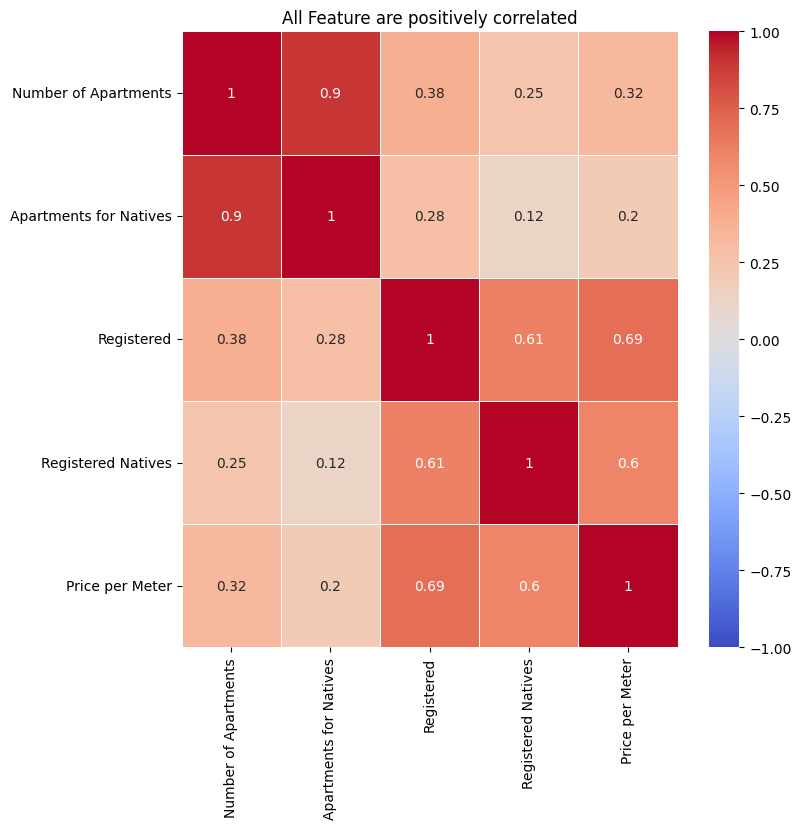

In [430]:
# Compute the correlation matrix
correlation_matrix = df.loc[:,['Number of Apartments', 'Apartments for Natives', 'Registered','Registered Natives', 'Price per Meter']].corr()
# Plotting the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5,vmin=-1, vmax=1)
plt.title('All Feature are positively correlated')
plt.show()


In [ ]:
reg_df = df.groupby('End Date Registration').size().reset_index()

In [90]:
df.dtypes

מספר הגרלה               object
סיום הרשמה               object
יישוב                    object
קבלן                     object
דירות בהגרלה             object
מתוכם דירות לבני מקום    object
נרשמים בהגרלה            object
מתוכם נרשמים בני מקום    object
מחיר למטר                object
מענק                      int64
dtype: object

In [91]:
df.columns

Index(['מספר הגרלה', 'סיום הרשמה', 'יישוב', 'קבלן', 'דירות בהגרלה',
       'מתוכם דירות לבני מקום', 'נרשמים בהגרלה', 'מתוכם נרשמים בני מקום',
       'מחיר למטר', 'מענק'],
      dtype='object')

In [442]:
column_to_int = ['מספר הגרלה', 'דירות בהגרלה', 'מתוכם דירות לבני מקום', 'נרשמים בהגרלה', 'מתוכם נרשמים בני מקום','מענק']
for col in column_to_int:
    try:
        df[col]=df[col].astype(int)
    except:
        print(f'{col} cannot be convert to integer')

מספר הגרלה cannot be convert to integer
דירות בהגרלה cannot be convert to integer
מתוכם דירות לבני מקום cannot be convert to integer
נרשמים בהגרלה cannot be convert to integer
מתוכם נרשמים בני מקום cannot be convert to integer


In [443]:
df[df['דירות בהגרלה']=='* 1000 ']

,מספר הגרלה,סיום הרשמה,יישוב,קבלן,דירות בהגרלה,מתוכם דירות לבני מקום,נרשמים בהגרלה,מתוכם נרשמים בני מקום,מחיר למטר,מענק
72,2315,19/10/2023,כלל היישובים,מענקים לרוכשי דירות יד שנייה,* 1000,לא רלוונטי,"20,834",לא רלוונטי,לא רלוונטי,50000


In [444]:
df = df.drop(72).reset_index()

In [462]:
df['נרשמים בהגרלה'] = df['נרשמים בהגרלה'].apply(lambda x: int(x.replace(',', '')))

In [471]:
# Convert the column to numeric, coerce non-numeric values to NaN
df['דירות בהגרלה'] = pd.to_numeric(df['דירות בהגרלה'], errors='coerce')

# Convert NaN values to integers (if desired)
df['דירות בהגרלה'] = df['דירות בהגרלה'].fillna(0).astype(int)

In [473]:
# Convert the column to numeric, coerce non-numeric values to NaN
df['מתוכם דירות לבני מקום'] = pd.to_numeric(df['מתוכם דירות לבני מקום'], errors='coerce')

# Convert NaN values to integers (if desired)
df['מתוכם דירות לבני מקום'] = df['מתוכם דירות לבני מקום'].fillna(0).astype(int)

In [446]:
df['מתוכם נרשמים בני מקום']=df['מתוכם נרשמים בני מקום'].apply(lambda x: int(x.replace(',', '')))


In [474]:
df.dtypes

index                      int64
מספר הגרלה                object
סיום הרשמה                object
יישוב                     object
קבלן                      object
דירות בהגרלה               int32
מתוכם דירות לבני מקום      int32
נרשמים בהגרלה              int64
מתוכם נרשמים בני מקום      int64
מחיר למטר                float64
מענק                       int32
dtype: object

In [457]:
def extract_price(x):
    try:
        if isinstance(x, str):
            return float(x.split('₪')[1].replace(',', ''))
        else:
            return None
    except (IndexError, ValueError):
        return None

df['מחיר למטר'] = df['מחיר למטר'].apply(extract_price)


In [459]:
df.dtypes

index                      int64
מספר הגרלה                object
סיום הרשמה                object
יישוב                     object
קבלן                      object
דירות בהגרלה              object
מתוכם דירות לבני מקום     object
נרשמים בהגרלה              int64
מתוכם נרשמים בני מקום      int64
מחיר למטר                float64
מענק                       int32
dtype: object

In [479]:
df = df[df['סיום הרשמה']!='טרם נפתחה הרשמה']

In [480]:
df['סיום הרשמה'] = pd.to_datetime(df['סיום הרשמה'])

C:\Users\bstho\AppData\Local\Temp\ipykernel_6136\758803339.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [481]:
df.dtypes

index                             int64
מספר הגרלה                       object
סיום הרשמה               datetime64[ns]
יישוב                            object
קבלן                             object
דירות בהגרלה                      int32
מתוכם דירות לבני מקום             int32
נרשמים בהגרלה                     int64
מתוכם נרשמים בני מקום             int64
מחיר למטר                       float64
מענק                              int32
dtype: object

In [482]:
df.reset_index(drop=True, inplace=True)

In [483]:
df.drop(columns='index', inplace=True)

In [484]:
df.columns

Index(['מספר הגרלה', 'סיום הרשמה', 'יישוב', 'קבלן', 'דירות בהגרלה',
       'מתוכם דירות לבני מקום', 'נרשמים בהגרלה', 'מתוכם נרשמים בני מקום',
       'מחיר למטר', 'מענק'],
      dtype='object')

In [485]:
df = df.rename(columns={'מספר הגרלה':'Lottery Number', 'סיום הרשמה':'Last Date Registration', 'יישוב':'Location', 'קבלן':'Contractor', 'דירות בהגרלה':'Number of Apartments',
       'מתוכם דירות לבני מקום':'Apartments for Natives', 'נרשמים בהגרלה':'Registered', 'מתוכם נרשמים בני מקום':"Registered Natives",
       'מחיר למטר':'Price per Meter', 'מענק':'Grant'})

In [486]:
df = df.rename(columns={'Registration End':'End Date Registration'})

In [487]:
df

,Lottery Number,Last Date Registration,Location,Contractor,Number of Apartments,Apartments for Natives,Registered,Registered Natives,Price per Meter,Grant
0,2360,2024-02-13,אילת,"עמרם אברהם חברה לבנין בע""מ",63,31,6370,1709,12206.00,0
1,2361,2024-02-13,אילת,"שם שיכון ויזמות בע""מ",51,25,6056,1715,12206.00,0
2,2362,2024-02-13,אלעד,"הדס קפיטל (ז.ס.ב) בע""מ , גילת מגורים (ג-ר) בע""מ",160,56,21530,1954,17206.02,0
3,2363,2024-02-13,אלעד,"אקה פיתוח ותשתיות בע""מ",134,46,21504,1954,17678.70,0
4,2364,2024-02-13,אלעד,"אי.אס.איי אחזקות בע""מ",128,44,21263,1964,17886.96,0
...,...,...,...,...,...,...,...,...,...,...
2174,105,2016-04-03,לוד,זוהר וצפריר שרבט יזמות ובניה (2001),376,75,6639,631,7131.15,0
2175,104,2016-03-27,עפולה,"א.נ. בונים בעמק בע""מ",71,22,4446,614,5328.18,40000
2176,103,2016-03-23,עפולה,י.ס.ד בעמק יזמות ובנייה,167,54,4327,618,5484.96,40000
2177,102,2016-03-15,ראש העין,"אדור א.ד. פרוייקטים בע""מ",38,0,6897,1047,2989999.35,0


In [488]:
df['Natives Chance to win'] = df['Apartments for Natives']/df['Registered Natives'] 
df['non-Natives Chance to win'] = (df['Number of Apartments']-df['Apartments for Natives'])/(df['Registered']-df['Registered Natives'])


In [489]:
df.loc[(df['Registered Natives']==0)&(df['Apartments for Natives']>0),'Natives Chance to win'] =1

In [490]:
df.loc[df['Natives Chance to win']>1,'Natives Chance to win'] =1
df.loc[df['non-Natives Chance to win']>1,'non-Natives Chance to win'] =1


In [491]:
df

,Lottery Number,Last Date Registration,Location,Contractor,Number of Apartments,Apartments for Natives,Registered,Registered Natives,Price per Meter,Grant,Natives Chance to win,non-Natives Chance to win
0,2360,2024-02-13,אילת,"עמרם אברהם חברה לבנין בע""מ",63,31,6370,1709,12206.00,0,0.018139,0.006865
1,2361,2024-02-13,אילת,"שם שיכון ויזמות בע""מ",51,25,6056,1715,12206.00,0,0.014577,0.005989
2,2362,2024-02-13,אלעד,"הדס קפיטל (ז.ס.ב) בע""מ , גילת מגורים (ג-ר) בע""מ",160,56,21530,1954,17206.02,0,0.028659,0.005313
3,2363,2024-02-13,אלעד,"אקה פיתוח ותשתיות בע""מ",134,46,21504,1954,17678.70,0,0.023541,0.004501
4,2364,2024-02-13,אלעד,"אי.אס.איי אחזקות בע""מ",128,44,21263,1964,17886.96,0,0.022403,0.004353
...,...,...,...,...,...,...,...,...,...,...,...,...
2174,105,2016-04-03,לוד,זוהר וצפריר שרבט יזמות ובניה (2001),376,75,6639,631,7131.15,0,0.118859,0.050100
2175,104,2016-03-27,עפולה,"א.נ. בונים בעמק בע""מ",71,22,4446,614,5328.18,40000,0.035831,0.012787
2176,103,2016-03-23,עפולה,י.ס.ד בעמק יזמות ובנייה,167,54,4327,618,5484.96,40000,0.087379,0.030466
2177,102,2016-03-15,ראש העין,"אדור א.ד. פרוייקטים בע""מ",38,0,6897,1047,2989999.35,0,0.000000,0.006496


In [492]:
df.sort_values(by='non-Natives Chance to win',ascending=False)

,Lottery Number,Last Date Registration,Location,Contractor,Number of Apartments,Apartments for Natives,Registered,Registered Natives,Price per Meter,Grant,Natives Chance to win,non-Natives Chance to win
1383,977,2018-12-30,טירת כרמל,"פרץ בוני הנגב (1993) בע""מ",155,18,119,28,8814.78,0,0.642857,1.0
993,1396,2019-10-02,בית שמש,"מגן - עבודות הנדסה בנאיות בע""מ",30,0,30,0,8672.04,0,NaN,1.0
1250,1144,2019-04-27,קריית ים,"שובל ביצוע פרוייקטים בע""מ",121,9,145,53,8411.13,0,0.169811,1.0
1832,539,2017-12-13,נחף,מחאמיד עלי,32,16,9,1,5235.75,60000,1.000000,1.0
1953,385,2017-11-01,עכו,"משכנות הכרם עכו בע""מ",118,59,119,70,8153.73,40000,0.842857,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1513,817,2018-09-12,חריש,"דונה חברה להנדסה ובנין בע""מ",8,8,532,2,7580.43,40000,1.000000,0.0
72,2312,2023-06-07,אופקים,"י.ח. דמרי בניה ופיתוח בע""מ",2,2,16797,214,6786.00,60000,0.009346,0.0
1514,821,2018-09-12,יבנה,"דור-אל ש. הנדסה בניה והשקעות בע""מ",28,28,1148,126,10056.15,0,0.222222,0.0
654,1701,2020-12-05,נתיבות,"קבוצת אהרוני (מ.א) יזום והשקעות בע""",10,10,1835,118,7428.33,60000,0.084746,0.0


In [526]:
df.columns

Index(['Lottery Number', 'Last Date Registration', 'Location', 'Contractor',
       'Number of Apartments', 'Apartments for Natives', 'Registered',
       'Registered Natives', 'Price per Meter', 'Grant',
       'Natives Chance to win', 'non-Natives Chance to win'],
      dtype='object')

In [ ]:
location_to_region = {
    'אילת': 'דרום',
    'אלעד': 'מרכז',
    'אשקלון': 'דרום',
    'בית דגן': 'מרכז',
    'בני עי"ש': 'מרכז',
    'ירושלים': 'מרכז',
    'מודיעין-מכבים-רעות': 'מרכז',
    'מעלות-תרשיחא': 'צפון',
    'פתח תקווה': 'מרכז',
    'צפת': 'צפון',
    'קריית גת': 'דרום',
    'קריית מלאכי': 'דרום',
    'קריית עקרון': 'דרום',
    'קריית שמונה': 'צפון',
    'רחובות': 'מרכז',
    'רכסים': 'צפון',
    'אופקים': 'דרום',
    'טבריה': 'צפון',
    'מגדל העמק': 'צפון',
    'נתניה': 'מרכז',
    'עכו': 'צפון',
    'ראשון לציון': 'מרכז',
    'שדרות': 'דרום',
    'אשדוד': 'דרום',
    'באר יעקב': 'מרכז',
    'חיפה': 'צפון',
    'חריש': 'צפון',
    'יבנה': 'מרכז',
    'כפר קאסם': 'מרכז',
    'כרמיאל': 'צפון',
    'נוף הגליל': 'צפון',
    'נתיבות': 'דרום',
    'ערד': 'דרום',
    'קצרין': 'צפון',
    'ראש העין': 'מרכז',
    'אלפי מנשה': 'מרכז',
    'אלקנה': 'מרכז',
    'יהוד': 'מרכז',
    'נהרייה': 'צפון',
    'עמנואל': 'מרכז',
    'קדימה-צורן': 'מרכז',
    'קרני שומרון': 'צפון',
    'רמלה': 'מרכז',
    'באר שבע': 'דרום',
    'גבע בנימין': 'מרכז',
    'לוד': 'מרכז',
    'סח\'נין': 'צפון',
    'עפולה': 'צפון',
    'אריאל': 'מרכז',
    'ביתר עילית': 'מרכז',
    'מבשרת ציון': 'מרכז',
    'מעלה אדומים': 'מרכז',
    'נס ציונה': 'מרכז',
    'גן יבנה': 'מרכז',
    'ג\'סר א-זרקא': 'מרכז',
    'מצפה רמון': 'דרום',
    'עתלית': 'מרכז',
    'קריית ים': 'מרכז',
    'בית שאן': 'צפון',
    'בית שמש': 'מרכז',
    'דייר חנא': 'צפון',
    'דימונה': 'דרום',
    'טורעאן': 'צפון',
    'כפר ברא': 'צפון',
    'מעלה אפרים': 'מרכז',
    'נצרת': 'צפון',
    'עראבה': 'צפון',
    'פורייה - כפר עבודה': 'צפון',
    'רמת גן': 'מרכז',
    'אור יהודה': 'מרכז',
    'אור עקיבא': 'מרכז',
    'בני ברק': 'מרכז',
    'בת חפר': 'מרכז',
    'טירת כרמל': 'צפון',
    'קריית טבעון': 'צפון',
    'תל אביב -יפו': 'מרכז',
    'בית אריה': 'מרכז',
    'קריית ביאליק': 'צפון',
    'יקנעם עילית': 'צפון',
    'בית אל': 'מרכז',
    'חצור הגלילית': 'צפון',
    'קריית אונו': 'מרכז',
    'גדרה': 'מרכז',
    'זכרון יעקב': 'מרכז',
    'שוהם': 'מרכז',
    'קריית מוצקין': 'מרכז',
    'חדרה': 'מרכז',
    'פרדס חנה-כרכור': 'מרכז',
    'נשר': 'צפון',
    'מדרשת בן גוריון': 'דרום',
    'הרצלייה': 'מרכז',
    'רעננה': 'מרכז',
    'ירוחם': 'דרום',
    'אבן יהודה': 'מרכז',
    'כפר יונה': 'מרכז',
    'שלומי': 'צפון',
    'כפר מנדא': 'צפון',
    'נחף': 'צפון',
    'מרכז שפירא': 'דרום',
    'קריית יערים': 'מרכז',
    'בנימינה-גבעת עדה*': 'צפון',
    'גני תקווה': 'מרכז',
    'חולון': 'מרכז',
    'פרדסייה': 'מרכז'
}

In [ ]:
df['Region'] = df['Location'].map(location_to_region)
df['country'] = 'ישראל'
m_df = pd.read_excel('mishtaken_data.xlsx')
m_df['LotteryEndSignupDate'] = pd.to_datetime(m_df['LotteryEndSignupDate'],format="yy-mm-dd")
df = df.merge(m_df.loc[:,['ConstructionPermitName', 'ProjectStatus', 'LotteryId']], how='inner',left_on='Lottery Number', right_on='LotteryId')

### project plots

In [498]:
reg_df = df.groupby('Last Date Registration').size().reset_index(name='event_count')

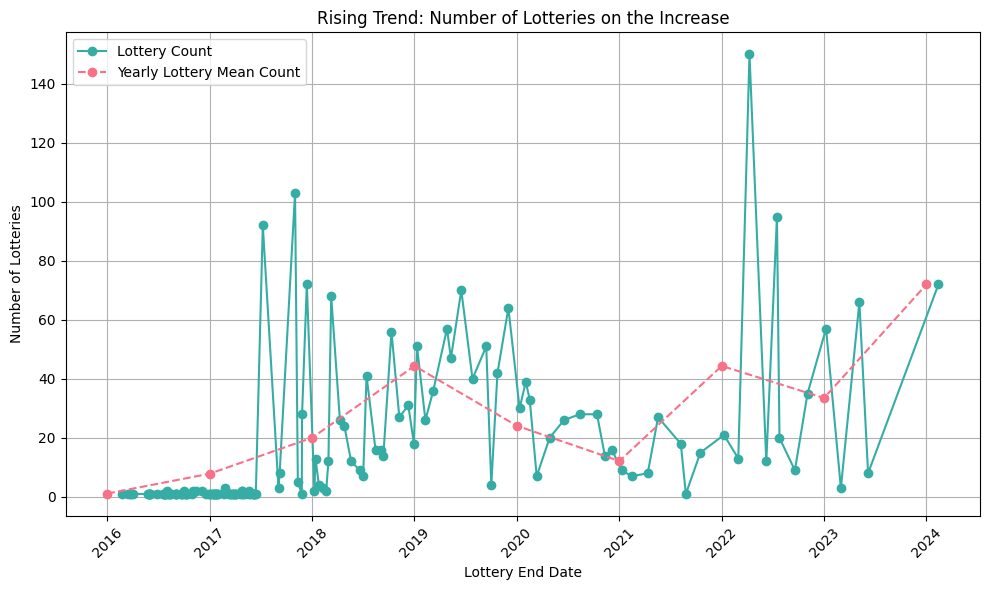

In [517]:
# Group by year and calculate the mean event count for each year
reg_df['Year'] = reg_df['Last Date Registration'].dt.year
mean_event_count = reg_df.groupby('Year')['event_count'].mean().reset_index()
mean_event_count['Year'] = pd.to_datetime(mean_event_count['Year'], format='%Y')  # Assuming 'Year' is in YYYY format

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(reg_df['Last Date Registration'], reg_df['event_count'], marker='o', linestyle='-', color=colors[1], label='Lottery Count')
plt.plot(mean_event_count['Year'], mean_event_count['event_count'], marker='o', linestyle='--', color=colors[0], label='Yearly Lottery Mean Count')
plt.title('Rising Trend: Number of Lotteries on the Increase')
plt.xlabel('Lottery End Date')
plt.ylabel('Number of Lotteries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)
plt.tight_layout()
plt.show()


In [534]:
df.to_csv('all_hist_lotteries.csv', index=False)

In [521]:
reg_df = pd.DataFrame(df.groupby(['Location','Last Date Registration']).agg({'Price per Meter':'mean','Lottery Number':'size','Number of Apartments': 'mean','Registered':'mean'})).reset_index()

In [522]:
reg_df

,Location,Last Date Registration,Price per Meter,Lottery Number,Number of Apartments,Registered
0,אבן יהודה,2019-05-11,9139.455,2,89.5,5093.0
1,אופקים,2016-08-30,5878.670,1,194.0,6406.0
2,אופקים,2017-04-03,5676.840,1,52.0,3257.0
3,אופקים,2017-07-09,5896.800,2,60.0,1278.0
4,אופקים,2018-03-10,5654.610,2,41.0,576.0
...,...,...,...,...,...,...
921,שלומי,2018-04-10,6054.750,1,7.0,45.0
922,שלומי,2018-11-08,6054.750,1,5.0,130.0
923,שלומי,2019-04-27,6054.750,1,25.0,75.0
924,תל אביב -יפו,2019-05-11,18135.000,1,199.0,8699.0


In [523]:
# Assuming df is your DataFrame with the 'Location' column
top_locations = df['Location'].value_counts().head(5)
print(top_locations)

Location
אשקלון         189
באר שבע        100
בית שמש         96
ראשון לציון     85
דימונה          84
Name: count, dtype: int64


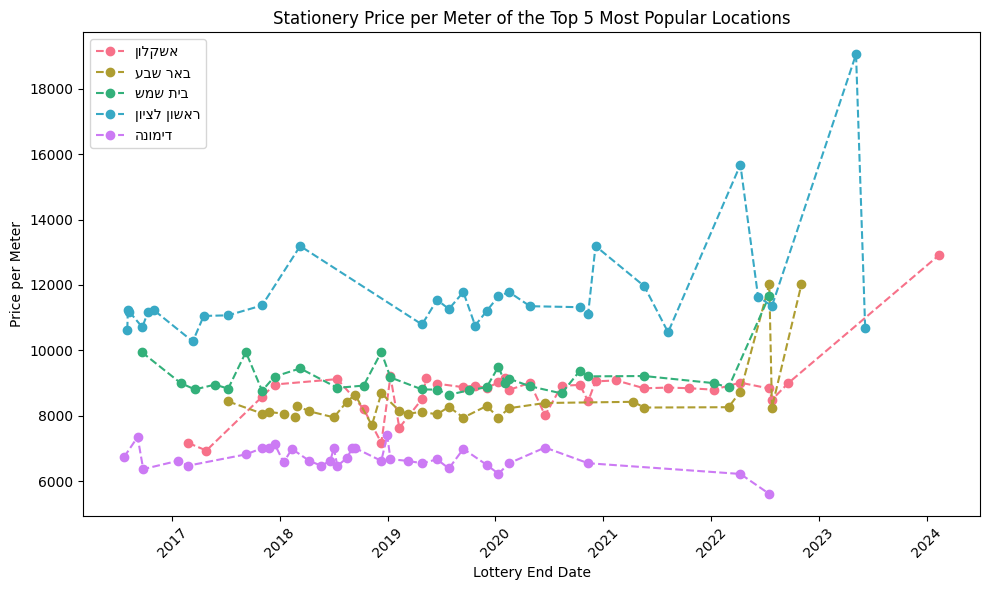

In [525]:
# Plotting the time series
# Top 5 most popular locations of lottery 
locations = np.array(top_locations.index)
# Define a custom color palette
colors = sns.color_palette("husl", len(top_locations))

# Plotting
plt.figure(figsize=(10, 6))
for i,location in enumerate(locations):
    plt.plot(reg_df[reg_df['Location']==location]['Last Date Registration'], reg_df[reg_df['Location']==location]['Price per Meter'], marker='o', linestyle='--', label=location[::-1],color=colors[i])
plt.title('Stationery Price per Meter of the Top 5 Most Popular Locations')
plt.xlabel('Lottery End Date')
plt.ylabel('Price per Meter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(False)
plt.tight_layout()
plt.legend()
plt.show()

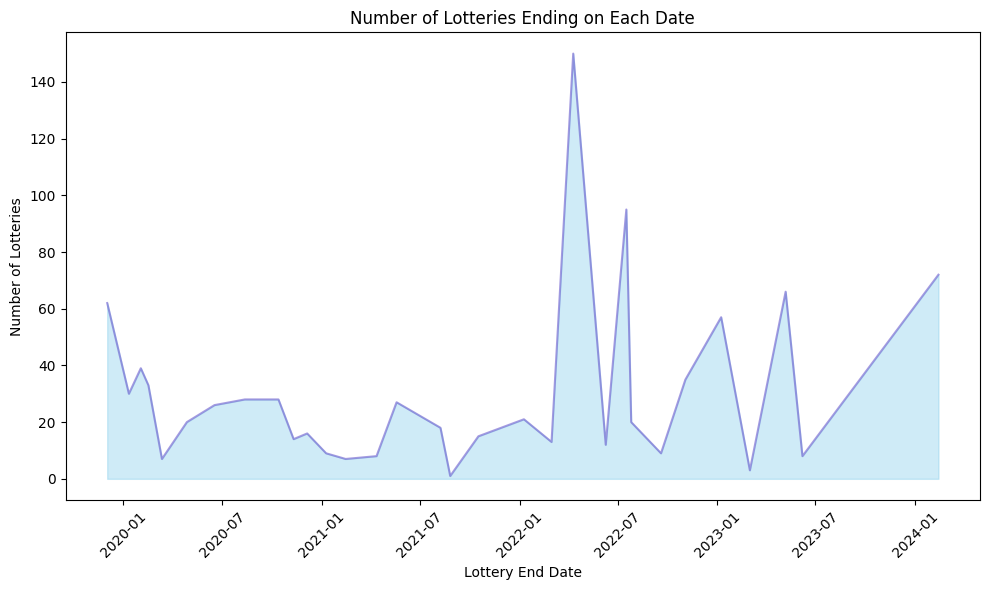

In [303]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'End Date Registration' and count the number of lotteries for each date
lottery_counts = df.groupby(['Location', 'End Date Registration']).size()

# Plotting the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(lottery_counts.index, lottery_counts.values, color='skyblue', alpha=0.4)
plt.plot(lottery_counts.index, lottery_counts.values, color='Slateblue', alpha=0.6)

plt.fill_between(lottery_counts.index, lottery_counts.values, color='skyblue', alpha=0.4)
plt.plot(lottery_counts.index, lottery_counts.values, color='Slateblue', alpha=0.6)
plt.xlabel('Lottery End Date')
plt.ylabel('Number of Lotteries')
plt.title('Number of Lotteries Ending on Each Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [317]:
# Extract the top 5 locations based on the count of lotteries
top_locations = df['Location'].value_counts().head(5).index

# Filter the data for the top 5 locations
top_locations_data = df[df['Location'].isin(top_locations)]

# Group by 'Location' and 'End Date Registration' and count the number of lotteries for each date for each location
lottery_counts_by_location = top_locations_data.groupby(['Location', 'End Date Registration']).size().unstack(fill_value=0)